# IROP Project File

## Generalisation to Weighted Graph

The following produces illustrations for weighted graphs with the following rule:

Suppose the euclidian distance between two nodes is $d < R$ then the weight between the two nodes is given by $1-\frac{d}{R}$ for $R$ the radius defined in the full set of notes. 

In [114]:
import numpy as np


#Generates N nodes and returns an array of tuples of their position.
def N_node_gen(N):
    node_list = list()
    for _ in range(N):
        node_list.append(np.array((np.random.random(), np.random.random())))
    return node_list

test_nodes = N_node_gen(5)
test_nodes

[array([0.34705006, 0.10112003]),
 array([0.78269651, 0.92831339]),
 array([0.43650058, 0.10612372]),
 array([0.09882804, 0.87431397]),
 array([0.00153637, 0.51695285])]

In [115]:
import numpy as np

#Returns adjacency matrix of the generated graph

def adj_mat_gen(node_list, R):
    N = len(node_list)
    adj_mat = np.zeros((N, N), dtype=np.float64)
    for i in range(N):
        for j in range(i+1, N):
            dist = np.linalg.norm(node_list[i]-node_list[j])
            if dist < R:
                adj_mat[i, j] = 1 - dist/R
                adj_mat[j, i] = 1 - dist/R
    return adj_mat

test_adj_mat = adj_mat_gen(test_nodes, 0.5)

test_adj_mat

array([[0.        , 0.        , 0.82081929, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.82081929, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2592635 ],
       [0.        , 0.        , 0.        , 0.2592635 , 0.        ]])

In [116]:
#Produces the matrix W(i)

def W_i_gen(i, adj_mat, gamma):
    i -= 1
    W_i = np.zeros(np.shape(adj_mat), dtype=np.float64)
    N = np.shape(adj_mat)[0]
    for j in range(N):
        if adj_mat[i, j]:
            val = adj_mat[i, j].item()
            W_i[j, j] = 1 - gamma * val
            W_i[j, i] = gamma * val
        else:
            W_i[j, j] = 1
    return W_i

test_W_1 = W_i_gen(1, test_adj_mat, 0.5)

test_W_1

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.41040965, 0.        , 0.58959035, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

In [117]:
#A single step of the simulation

def update_step(x, adj_mat, gamma):
    N = len(x)
    i = np.random.randint(N, size=1)
    W_i = W_i_gen(i, adj_mat, gamma)
    return np.matmul(W_i, x)

test_x = np.random.random(size=5)
update_step(test_x, test_adj_mat, 0.5)

array([0.5367776 , 0.03033502, 0.94574235, 0.27415779, 0.88978026])

In [118]:
import numpy as np

def simulate(x_0, adj_mat, gamma, time):
    x_list = [x_0]
    for t in range(1, time+1):
        x_list.append(update_step(x_list[-1], adj_mat, gamma))
    return np.array(x_list)

test_x = np.random.random(size=5)
test_simulation = simulate(test_x, test_adj_mat, 0.5, 10)
test_simulation

array([[0.00293312, 0.19938823, 0.11520891, 0.66191192, 0.68504459],
       [0.00293312, 0.19938823, 0.11520891, 0.66491065, 0.68504459],
       [0.00293312, 0.19938823, 0.11520891, 0.66491065, 0.68243459],
       [0.00293312, 0.19938823, 0.11520891, 0.66718231, 0.68243459],
       [0.04901219, 0.19938823, 0.11520891, 0.66718231, 0.68243459],
       [0.04901219, 0.19938823, 0.08804114, 0.66718231, 0.68243459],
       [0.04901219, 0.19938823, 0.08804114, 0.66718231, 0.68243459],
       [0.06503005, 0.19938823, 0.08804114, 0.66718231, 0.68243459],
       [0.06503005, 0.19938823, 0.08804114, 0.66915949, 0.68243459],
       [0.06503005, 0.19938823, 0.07859716, 0.66915949, 0.68243459],
       [0.06503005, 0.19938823, 0.07302909, 0.66915949, 0.68243459]])

# This Cell sets up the rest of the simulations in this section!

In [119]:
N = 50
R = 2*np.sqrt(np.log(N)/N)
time = 1000
gamma = 0.5

node_list = N_node_gen(N)
adj_mat = adj_mat_gen(node_list, R)

x_0 = np.random.random(N)

In [120]:
#The following code investigates convergence in expectation to the initial value

simulate_num = 1000
desired_x = 1/N * np.sum(x_0) * np.ones(N)

x = np.zeros(N)
for _ in range(simulate_num):
    x += simulate(x_0, adj_mat, gamma, time = 100)[-1]
x /= simulate_num

print(np.linalg.norm(x - desired_x))

0.04334001867830338


In [121]:
#Convergence in expectation data generation

sim_num = 1000

desired_x = np.mean(x_0) * np.ones(N)

node_list = N_node_gen(N)
adj_mat = adj_mat_gen(node_list, R)

t_array = np.array([_ for _ in range(time+1)])
x_array = np.zeros((time+1, N))

for _ in range(sim_num):
    x_array += simulate(x_0, adj_mat, gamma, time)

x_array /= sim_num
x_array -= desired_x

plot_vals = np.linalg.norm(x_array, axis=1)

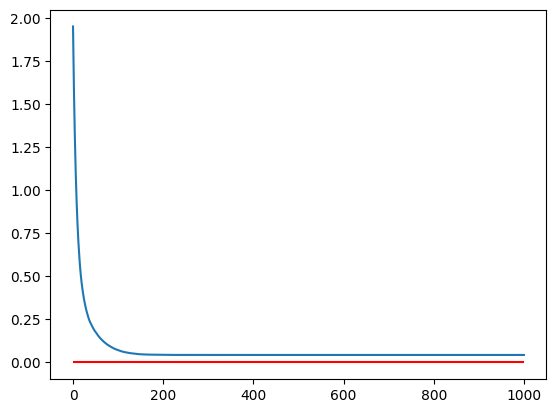

In [122]:
#Convergence in expectation plot

import matplotlib.pyplot as plt

plt.plot(t_array, plot_vals)
plt.hlines(0, 0, 1000, colors='r')

In [123]:
#Convergence in second moment data generation

t = time
sim_num = 1000

x_0 = np.random.random(N)
beta_matrix = np.identity(N) - 1/N * np.ones((N, N))
t_array = np.array([_ for _ in range(t+1)])
beta_arr = np.zeros((t+1, N), dtype=np.float64)

for _ in range(sim_num):
    output = simulate(x_0, adj_mat, gamma, t)
    for i in range(t+1):
        beta_arr[i] += beta_matrix@output[i]

plot_vals_2 = np.linalg.norm(beta_arr, axis=1)
plot_vals_2 /= sim_num

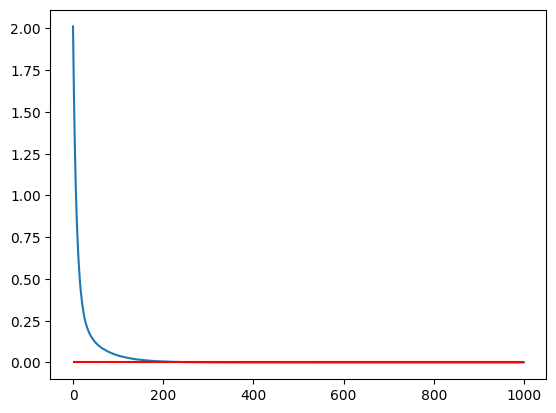

In [124]:
#Convergence in second moment plot

import matplotlib.pyplot as plt

plt.plot(t_array, plot_vals_2)
plt.hlines(0, 0, 1000, colors='r')

In [125]:
#Mean Square Error Data Generation

t = time
sim_num = 1000

x_0 = np.random.random(N)
J = np.ones([N, N])
x_expected = np.mean(x_0) * np.ones(N)
t_array = np.array([_ for _ in range(t+1)])
alpha_arr = np.zeros((t+1, N), dtype=np.float64)

for _ in range(sim_num):
    output = simulate(x_0, adj_mat, gamma, t)
    for i in range(t+1):
        alpha_arr[i] += output[i] - x_expected
    alpha_arr[-1]

plot_vals_3 = np.linalg.norm(alpha_arr, axis=1)
plot_vals_3 /= sim_num

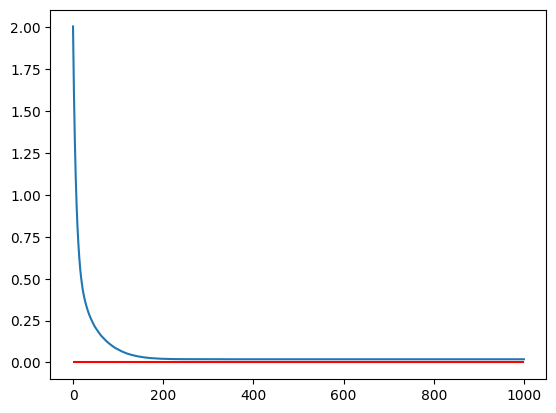

In [126]:
#Mean Square Error plot

import matplotlib.pyplot as plt

plt.plot(t_array, plot_vals_3)
plt.hlines(0, 0, 1000, colors='r')

In [127]:
import numpy as np

def simulate_cutoff_at_conv(x_0, adj_mat, gamma, eps=0.01, t_max = 5000):
    x_list = [x_0]
    t = 1
    N = len(x_0)
    while True:
        x_list.append(update_step(x_list[-1], adj_mat, gamma))
        if np.linalg.norm(x_list[-1] - np.mean(x_list[-1]) * np.ones(N))**2/N < eps or t >= t_max:
            break
        t += 1
    return np.array(x_list)

test_x = np.random.random(size=5)
test_simulation = simulate_cutoff_at_conv(test_x, test_adj_mat, 0.5)
test_simulation

array([[0.9448654 , 0.2596068 , 0.21949941, 0.34176894, 0.41038466],
       [0.9448654 , 0.2596068 , 0.51719661, 0.34176894, 0.41038466],
       [0.769346  , 0.2596068 , 0.51719661, 0.34176894, 0.41038466],
       ...,
       [0.61640279, 0.2596068 , 0.61640279, 0.36675898, 0.36675898],
       [0.61640279, 0.2596068 , 0.61640279, 0.36675898, 0.36675898],
       [0.61640279, 0.2596068 , 0.61640279, 0.36675898, 0.36675898]],
      shape=(5001, 5))

In [128]:
import numpy as np

def simulate_return_var(x_0, adj_mat, gamma, t):
    x_list = [x_0]
    N = len(x_0)
    for t in range(1, t+1):
        x_list.append(update_step(x_list[-1], adj_mat, gamma))
    return np.linalg.norm(x_list[-1] - np.mean(x_list[-1]) * np.ones(N))**2/N

test_x = np.random.random(size=5)
test_simulation = simulate_return_var(test_x, test_adj_mat, 0.5, 5)
test_simulation

np.float64(0.03841169394378666)

In [129]:
t_array = np.arange(50, 5000, 50, dtype=np.int64)
var_array = np.zeros(t_array.shape, dtype=np.float64)

for i in range(len(var_array)):
    var_array[i] = simulate_return_var(x_0, adj_mat, gamma, t_array[i])

var_array

array([7.66492199e-03, 6.17601737e-05, 1.26077855e-05, 1.08163962e-06,
       2.43523517e-07, 1.36168896e-08, 2.13425270e-10, 8.37050300e-09,
       5.75860993e-10, 7.10294122e-11, 1.49920028e-13, 3.82498983e-13,
       1.35919187e-15, 1.95764520e-14, 8.97776227e-16, 2.07800684e-17,
       9.69666226e-19, 2.23610438e-18, 2.73582021e-20, 3.23637101e-21,
       3.72186290e-22, 2.20643394e-20, 1.04876867e-24, 5.83467645e-24,
       2.05139180e-23, 4.80133491e-27, 1.97557888e-28, 5.19171450e-27,
       7.53290674e-29, 4.71948363e-30, 3.93340838e-29, 2.45532957e-31,
       1.94750036e-32, 1.04339181e-31, 1.12782458e-32, 1.60237371e-32,
       2.09541178e-33, 2.46519033e-34, 7.95023881e-33, 6.16297582e-33,
       7.14905195e-33, 9.36772325e-33, 1.25724707e-32, 1.06003184e-32,
       5.17689969e-33, 1.38050658e-32, 3.88267477e-33, 5.30015921e-33,
       7.39557099e-33, 1.33120278e-32, 1.81191489e-32, 8.62816615e-33,
       8.13512809e-33, 4.00593428e-33, 2.15704154e-33, 1.54074396e-33,
      

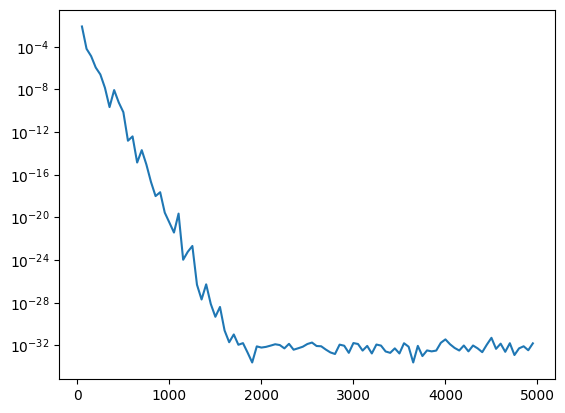

In [130]:
plt.semilogy(t_array, var_array)